#Asma Amir
# Titanic EDA Project

# This project aims to explore the data, to uncover hidden trends, visualize key relationships, and identify patterns related to survivors of TITANIC ship.



In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


uploaded = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [ ]:
import io
df = uploaded
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


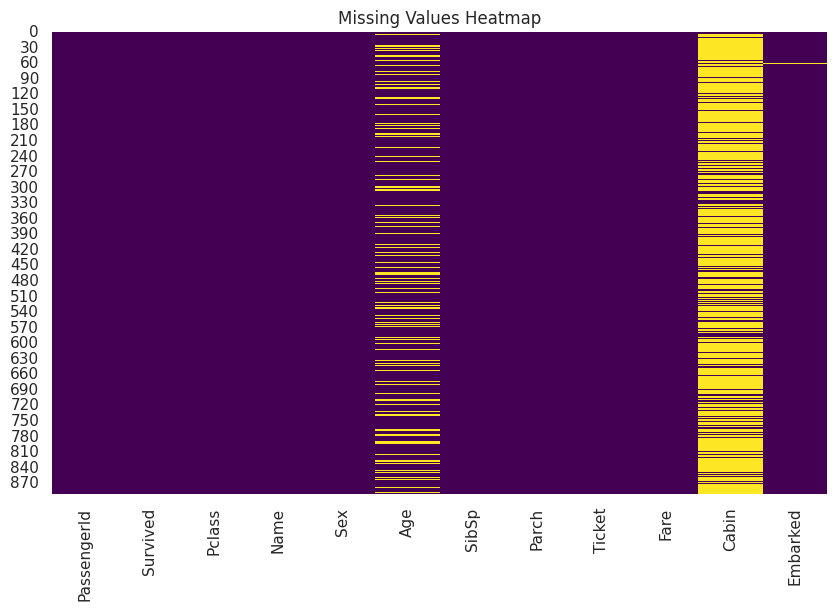

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
#  Data Cleaning (drop Cabin, fill Age)
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


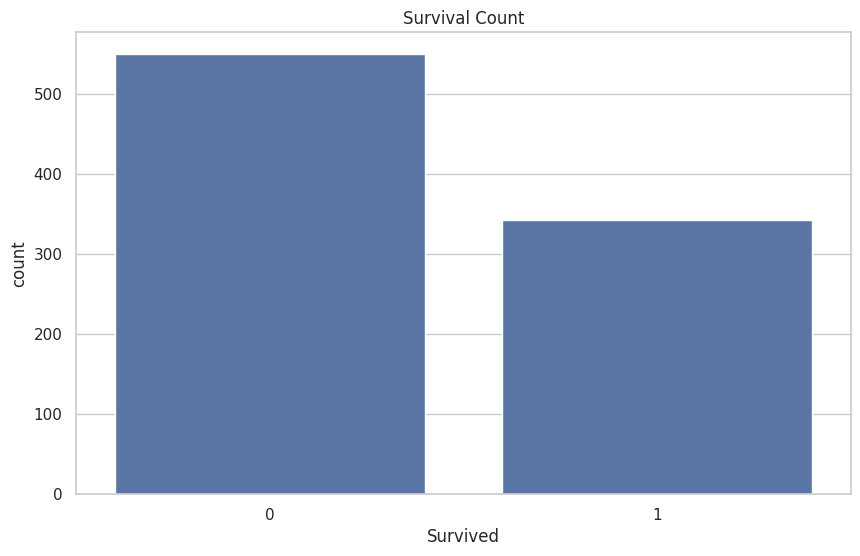

In [ ]:
# Univariate Analysis
# Countplot of Survived
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

**Survival Count (Bar Chart)**
Description: This chart shows the number of people who survived (1) and did not survive (0).

**Insight:**

A significantly larger number of passengers died (around 550) compared to those who survived (around 340).

This reflects the historical fact that more than half of the Titanic passengers perished during the disaster.

**Implication:** This survival disparity invites further exploration into the factors influencing survival (e.g., gender, class, age

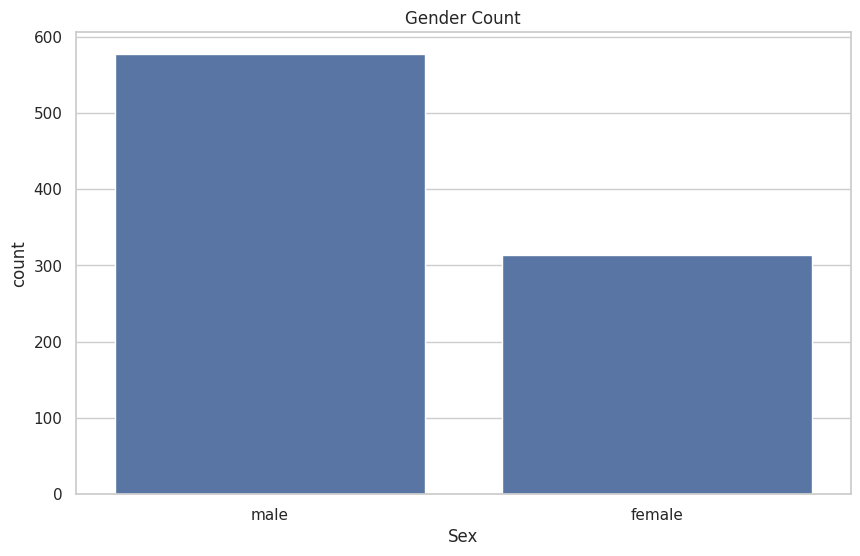

In [ ]:
# checking gender data
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')
plt.show()

**Gender Count (Bar Chart)**
Description: Distribution of passengers by gender.

**Insight:**

There were considerably more males (575) than females (315) on board.

**Implication:**

The gender imbalance could affect survival analysis, especially considering the "women and children first" evacuation protocol.

Combining this chart with survival data could help uncover gender-based survival trends.

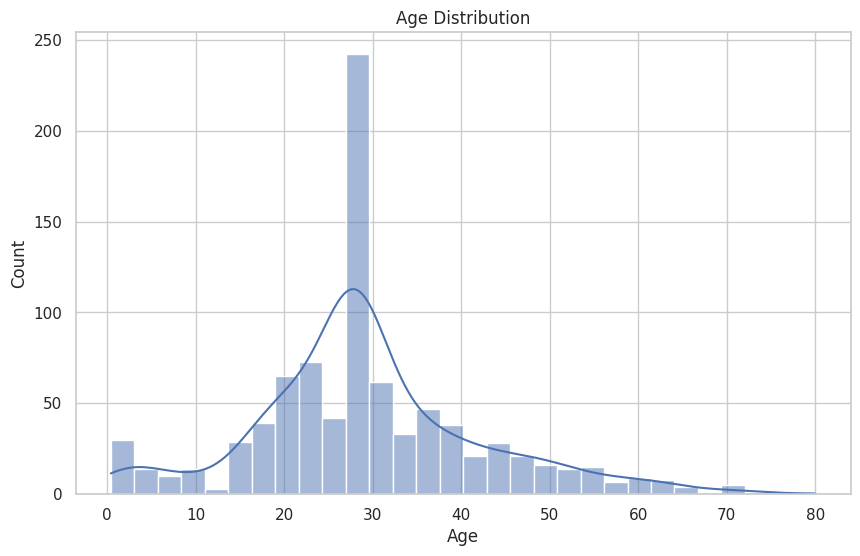

In [ ]:
# checking age data
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

**Age Distribution (Histogram + KDE Curve)**
Description: Distribution of passenger ages, with a smoothed kernel density estimate.

**Insight:**

The age distribution is right-skewed, with most passengers in their 20s and 30s.

There's a spike at around 28–30 years, suggesting either many individuals in that age group or data imputation around that value.

Very few passengers were older than 60.

**Implication:**

The age structure provides context for understanding which age groups were most at risk or most likely to survive.

Analysis combining age with survival status could highlight age-related vulnerabilities or priorities in rescue efforts.

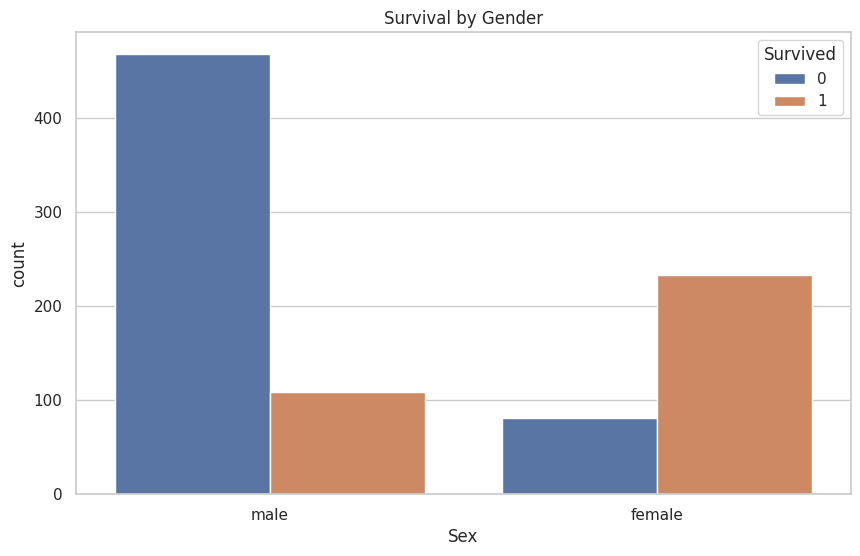

In [ ]:
#bivariate analysis to check survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

Estimated Survival Percentages by Gender
From approximate visual estimation:

**Males:**

~470 did not survive

~110 survived

Survival Rate ≈ (110 / (470+110)) * 100 ≈ **19%**

Mortality Rate ≈ 81%

**Females:**

~80 did not survive

~230 survived

Survival Rate ≈ (230 / (230+80)) * 100 ≈ **74%**

Mortality Rate ≈ 26%
**Interpretation and Historical Context**
Women had a much higher survival rate than men, aligning with historical evacuation practices: “women and children first.”

The stark contrast (74% vs. 19%) indicates gender was a strong determinant of survival.

This suggests that social norms and emergency protocols significantly influenced outcomes — crucial for both historical analysis and ethical studies of disaster response.



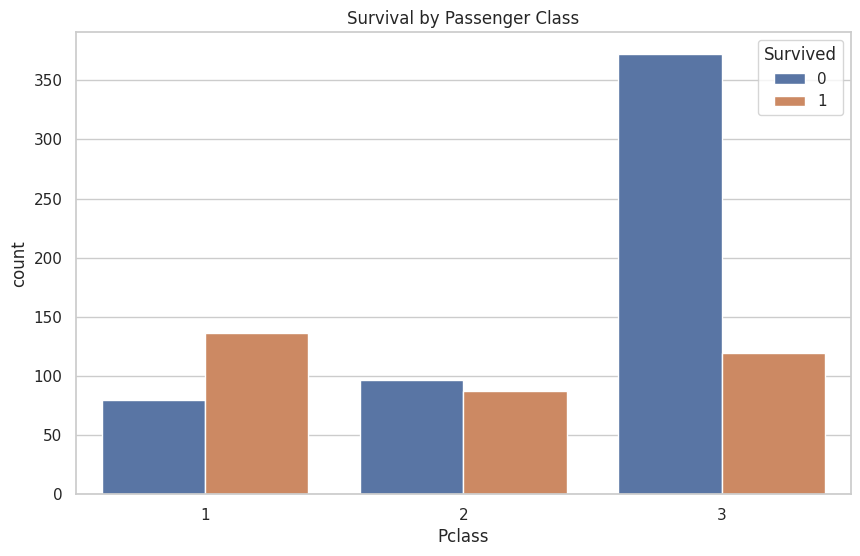

In [ ]:
#checking survials based on class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


**Interpretation and Historical Context**
Survival likelihood increased with class — **First Class passengers had the highest survival rates.**

**Third Class **(lowest socio-economic status) **suffered the highest mortality, **potentially due to:

Limited access to lifeboats.

Physical barriers (e.g., gates between classes).

**Priority **given to First and Second Class during evacuation.

This strongly supports historical analyses suggesting **structural inequality played a major role in Titanic survival outcomes.**

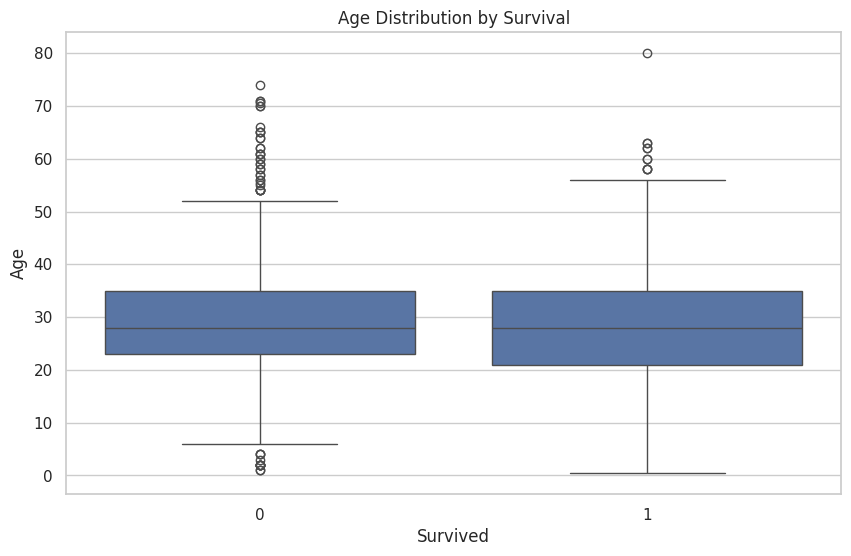

In [ ]:
#checking survival by age
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

**Key Observations:**
**1. Median Age:**
Median age for non-survivors (0): ~28 years

Median age for survivors (1): ~28 years

→ Virtually the same, indicating that **age alone did not heavily influence survival on average.**

**2. Age Spread** (Interquartile Range - IQR):
Survivors had a slightly broader IQR, especially skewed toward younger ages.

Non-survivors' age distribution was more tightly grouped around mid-20s to 40.

**3. Young Survivors:**
Noticeable lower minimum ages among survivors (some close to 0), highlighting high survival among children.

This is consistent with the "women and children first" principle — young passengers had a greater chance of survival.

**4. Outliers:**
A few older individuals (60–80+) survived, but they are rare.

Most passengers above age 60, whether survived or not, were outliers — suggesting they were a small minority.



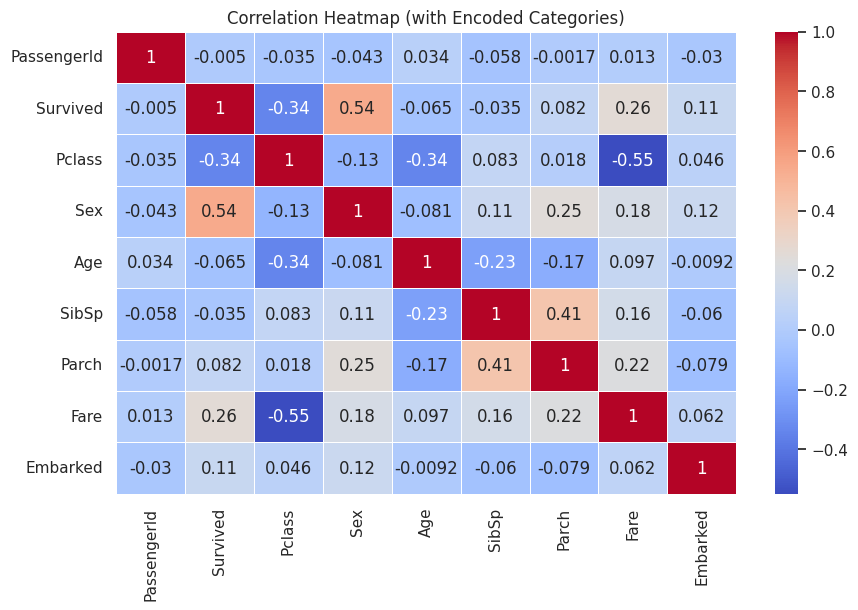

In [ ]:
# Encoding Categorical Variables

# First making a copy to avoid modifying original if needed
df_encoded = df.copy()

# Convert 'Sex' and 'Embarked' to numeric using label encoding
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Droping nonnumeric irrelevant string columns
df_encoded.drop(['Name'],axis=1, inplace=True)

# correlation
corr = df_encoded.corr()

# 🔥 Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap (with Encoded Categories)')
plt.show()


**Key insights**

**Strong Positive Correlation:**

**Fare and Survived (0.26):** Passengers who paid higher fares had a notably higher chance of survival. This could be linked to their class, as first-class passengers likely had more expensive tickets and also received priority during the evacuation.
**Parch and SibSp (0.41):** There's a moderate positive correlation between the number of parents/children (Parch) and the number of siblings/spouses (SibSp) a passenger had. This suggests that people often traveled with family members.
Strong Negative Correlation:

**Pclass and Fare (-0.55):** As passenger class (Pclass) increases (1st class is 1, 2nd is 2, 3rd is 3), the fare tends to decrease. This is expected as **lower classes had cheaper tickets.**
Pclass and Survived (-0.34): There is a moderate negative correlation between passenger class and survival. First-class passengers had a higher survival rate compared to those in second and third class.
Moderate Positive Correlation:

**Sex and Survived (0.54): **Sex shows a significant positive correlation with survival. Typically, in such datasets where 'Sex' is encoded numerically (e.g., female=1, male=0), this positive correlation indicates that **females had a higher survival rate than males.** This aligns with the "women and children first" protocol.
**Parch and Fare (0.22): **Passengers with more parents/children aboard tended to pay slightly higher fares, possibly indicating family accommodations.
SibSp and Fare (0.16): Similarly, **passengers with more siblings/spouses tended to have slightly higher fares,** likely due to booking for larger groups.
Weak Correlation:

**Age and Survived (-0.065):** bold textThe correlation between age and survival is weak and slightly negative, suggesting a minor tendency for younger individuals to have a slightly higher survival rate. However, this correlation is not very strong.
Most other correlations between features (e.g., PassengerId with others, Embarked with Age, SibSp, Parch) are quite weak, indicating little to no linear relationship between these variables.
**In summary,** the heatmap highlights that **passenger class, fare, and sex **were the most influential factors linearly correlated with survival on the Titanic. Higher-class passengers who paid more and were female had a greater chance of surviving. The presence of family (Parch and SibSp) is correlated, but its direct linear impact on survival as shown here is weaker compared to class, fare, and sex.

# 🧠 Overall Key Insights (write in markdown cell or comments)
"""
- Females had higher survival rates than males.
- First-class passengers were more likely to survive.
- Children and younger adults had a higher chance of survival.
